In [2]:
import numpy as np
import os
from window import Window
from extract_features import extract_features, extract_labels
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

Load the data and extract features

In [3]:
magnetometer_file = os.path.join('data', 'good_data', 'magnetometer_data.csv')
magnetometerData = np.genfromtxt(magnetometer_file, delimiter=',')
barometer_file = os.path.join('data', 'good_data', 'barometer_data.csv')
barometerData = np.genfromtxt(barometer_file, delimiter=',')
light_file = os.path.join('data', 'good_data', 'light_data.csv')
lightData = np.genfromtxt(light_file, delimiter=',')
data = {'magnetometer': magnetometerData, 'barometer': barometerData, 'light': lightData}

n_features = 24

X = np.zeros((0,n_features))
y = np.zeros(0,)

window_size = 2000

total = 0

while(sum(map(lambda x: len(x), data.values())) != 0):

    window = Window(window_size)

    data = window.push_slices(data)
   
    if (window.allCheck()):

        X = np.append(X, np.transpose(extract_features(window).reshape(-1, 1)), axis=0)
        # append label:
        y = np.append(y, [extract_labels(window)])
    else:
        total += 1

Dict of labels for each feature

In [ ]:
features = {
    0: 'mag_x_mean',
    1: 'mag_y_mean',
    2: 'mag_z_mean',
    3: 'mag_resolved_mean',
    4: 'bar_mean',
    5: 'light_mean',
    6: 'mag_x_var',
    7: 'mag_y_var',
    8: 'mag_z_var',
    9: 'mag_resolved_var',
    10: 'bar_var',
    11: 'light_var',
    12: 'mag_x_fft_1',
    13: 'mag_x_fft_2',
    14: 'mag_y_fft_1',
    15: 'mag_y_fft_2',
    16: 'mag_z_fft_1',
    17: 'mag_z_fft_2',
    18: 'mag_resolved_fft_1',
    19: 'mag_resolved_fft_2',
    20: 'bar_fft_1',
    21: 'bar_fft_2',
    22: 'light_fft_1',
    23: 'light_fft_2'
}

Code below makes figures plotting features versus eachother with class labels for each point

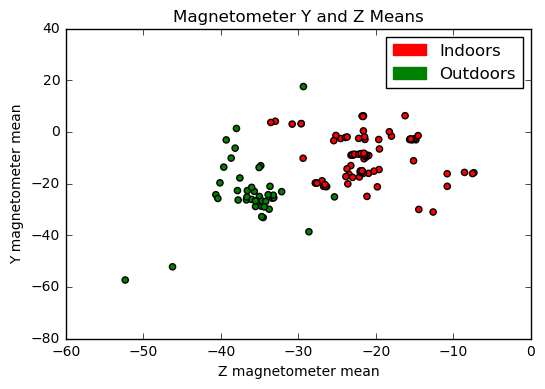

In [67]:
plt.figure()
colormappings = {0.0: 'red', 1.0: 'green'}
colors = map(lambda x: colormappings[x], y)
plt.scatter(X[:,2], X[:,1], label='Outside', c=colors)
plt.xlabel('Z magnetometer mean')
plt.ylabel('Y magnetometer mean')
plt.title('Magnetometer Y and Z Means')
red_patch = mpatches.Patch(color='red', label='Indoors')
green_patch = mpatches.Patch(color='green', label='Outdoors')
plt.legend(handles=[red_patch, green_patch])
plt.show()

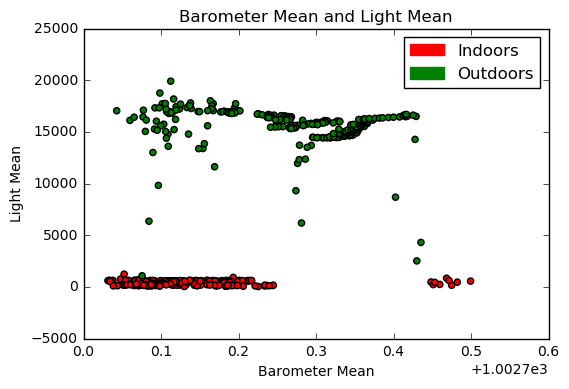

In [9]:
plt.figure()
colormappings = {0.0: 'red', 1.0: 'green'}
colors = map(lambda x: colormappings[x], y)
plt.scatter(X[:,4], X[:,5], label='Outside', c=colors)
plt.xlabel('Barometer Mean')
plt.ylabel('Light Mean')
plt.title('Barometer Mean and Light Mean')
red_patch = mpatches.Patch(color='red', label='Indoors')
green_patch = mpatches.Patch(color='green', label='Outdoors')
plt.legend(handles=[red_patch, green_patch])
plt.show()

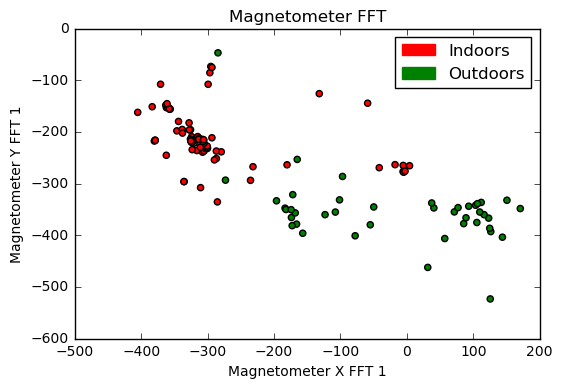

In [89]:
plt.figure()
colormappings = {0.0: 'red', 1.0: 'green'}
colors = map(lambda x: colormappings[x], y)
plt.scatter(X[:,12], X[:,14], label='Outside', c=colors)
plt.xlabel('Magnetometer X FFT 1')
plt.ylabel('Magnetometer Y FFT 1')
plt.title('Magnetometer FFT')
red_patch = mpatches.Patch(color='red', label='Indoors')
green_patch = mpatches.Patch(color='green', label='Outdoors')
plt.legend(handles=[red_patch, green_patch])
plt.show()

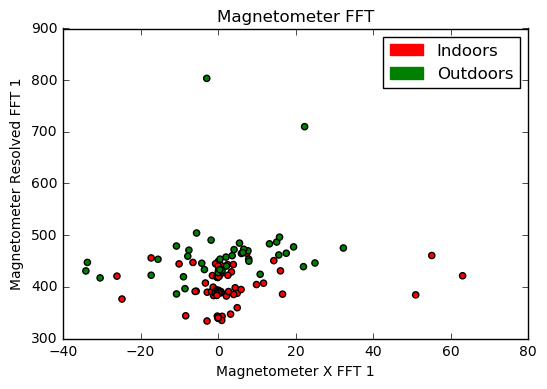

In [94]:
plt.figure()
colormappings = {0.0: 'red', 1.0: 'green'}
colors = map(lambda x: colormappings[x], y)
plt.scatter(X[:,16], X[:,18], label='Outside', c=colors)
plt.xlabel('Magnetometer X FFT 1')
plt.ylabel('Magnetometer Resolved FFT 1')
plt.title('Magnetometer FFT')
red_patch = mpatches.Patch(color='red', label='Indoors')
green_patch = mpatches.Patch(color='green', label='Outdoors')
plt.legend(handles=[red_patch, green_patch])
plt.show()

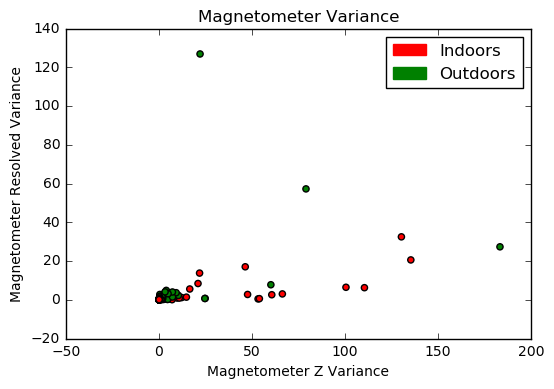

In [100]:
plt.figure()
colormappings = {0.0: 'red', 1.0: 'green'}
colors = map(lambda x: colormappings[x], y)
plt.scatter(X[:,8], X[:,9], label='Outside', c=colors)
plt.xlabel('Magnetometer Z Variance')
plt.ylabel('Magnetometer Resolved Variance')
plt.title('Magnetometer Variance')
red_patch = mpatches.Patch(color='red', label='Indoors')
green_patch = mpatches.Patch(color='green', label='Outdoors')
plt.legend(handles=[red_patch, green_patch])
plt.show()

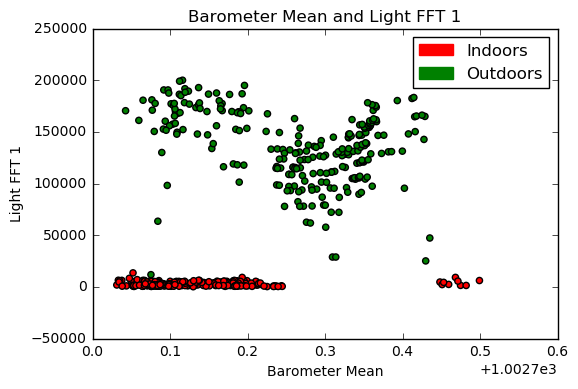

In [7]:
plt.figure()
colormappings = {0.0: 'red', 1.0: 'green'}
colors = map(lambda x: colormappings[x], y)
plt.scatter(X[:,4], X[:,22], label='Outside', c=colors)
plt.xlabel('Barometer Mean')
plt.ylabel('Light FFT 1')
plt.title('Barometer Mean and Light FFT 1')
red_patch = mpatches.Patch(color='red', label='Indoors')
green_patch = mpatches.Patch(color='green', label='Outdoors')
plt.legend(handles=[red_patch, green_patch])
plt.show()

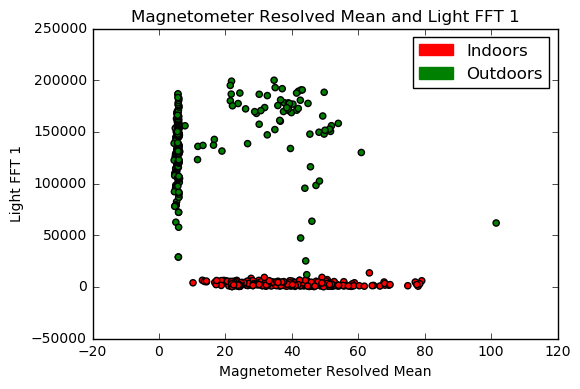

In [6]:
plt.figure()
colormappings = {0.0: 'red', 1.0: 'green'}
colors = map(lambda x: colormappings[x], y)
plt.scatter(X[:,3], X[:,22], label='Outside', c=colors)
plt.xlabel('Magnetometer Resolved Mean')
plt.ylabel('Light FFT 1')
plt.title('Magnetometer Resolved Mean and Light FFT 1')
red_patch = mpatches.Patch(color='red', label='Indoors')
green_patch = mpatches.Patch(color='green', label='Outdoors')
plt.legend(handles=[red_patch, green_patch])
plt.show()